In [2]:
import numpy as np
import pandas as pd
from edempy import Deck
from extrapolation import extrapolation
from LaceyClass import LaceyMixingAnalyzer
import matplotlib.pyplot as plt
from rnn.data_loader_rnn import RNNLoader
from rnn.rnn_extrap import plot_particles, import_dict
import os


sim_names = ["Rot_drum_mono", "Rot_drum_binary_mixed", "Rot_drum_400k"]
sim_name = sim_names[-1]
sim_path =rf"V:\GrNN_EDEM-Sims\{sim_name}.dem"

In [2]:
lacey_settings = f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt"

with open(lacey_settings, 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = int(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins)
rnn = RNNLoader(1,20,sim_path)


In [3]:
delta_t = 0.05
extrapolated_lacey = []
extrapolated_time = []
id_dict_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data"
id_dict = import_dict(id_dict_path, "id_dict")
plots_path = rf"{sim_path[:-4]}_data\Export_Data\extrap_algo_plots"

# b_coords_lacey, div_size_lacey = lacey.grid()
# for timestep in np.arange(rnn.start_t, rnn.end_t+delta_t, delta_t):
#     timestep_i = rnn.find_nearest(timestep, rnn.deck.timestepValues)
#     particles = rnn.get_particle_data(timestep_i)
#     particles = np.delete(particles, [3,4,5], 1)

#     plot_filename = rf"{plots_path}\{timestep:.2f}.png"
#     pred_t_mass = plot_particles(particles, id_dict, True, timestep, plot_path=plot_filename)
#     mass_1, mass_2, conc = lacey.bining(b_coords_lacey, div_size_lacey, pred_t_mass, cut_off)
#     Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(pred_t_mass))
#     print(f"{timestep}: {Lacey_index}")
#     extrapolated_lacey.append(Lacey_index)
#     extrapolated_time.append(timestep)

#np.savetxt(rf"{plots_path}\_lacey.csv", np.column_stack((extrapolated_time, extrapolated_lacey)), delimiter=",")
    

V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\extrap_algo_plots\10y_3.1_3.35\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\extrap_algo_plots\10y_3_3.05\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\extrap_algo_plots\10y_3_3.7\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\extrap_algo_plots\8y_3_4.6\_lacey.csv


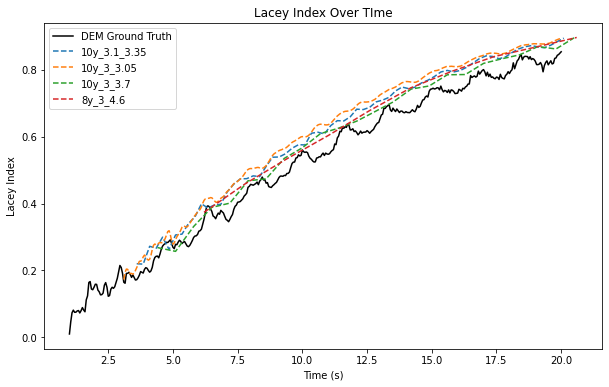

In [4]:
# Specify the folder path where your CSV files are located
folder_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data\extrap_algo_plots"
dem_file = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data\dem_sim_plots\actual_lacey.csv"

# Initialize an empty list to store numpy arrays from each file
data_arrays = []
names = []

# Function to read CSV file and return a numpy array
def read_csv_to_numpy(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Iterate through all files in the folder and its subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('_lacey.csv'):
            file_path = os.path.join(root, filename)
            print(file_path)
            
            # Read the CSV file and append the numpy array to data_arra'ArithmeticErrorys
            data_arrays.append(read_csv_to_numpy(file_path))
            names.append(os.path.basename(os.path.dirname(file_path)))

# Plot the data from all files
plt.figure(figsize=(10, 6))

dem_data = read_csv_to_numpy(dem_file)
plt.plot(dem_data[:, 0], dem_data[:, 1], label = "DEM Ground Truth", color="k")

for i, data_array in enumerate(data_arrays):
    plt.plot(data_array[:, 0], data_array[:, 1], label = names[i], linestyle="--")

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Lacey Index')
plt.title('Lacey Index Over TIme')
plt.legend()
plt.show()


V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_10_sl15_0.05s_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_10_sl15_0.05s_plots_new\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl10_3_5_0.05s_plots_20ep_64batch\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl15_3_6.5_0.05s_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl15_3_6.5_0.05s_plots_30ep_128batch\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl17_3_5_0.03s_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl25_3_4.4_0.02s_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl25_3_5_0.03s_128_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\RNNSR_plots\35_12_35_sl30_0.05s_plots\_lacey.csv
V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Dat

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


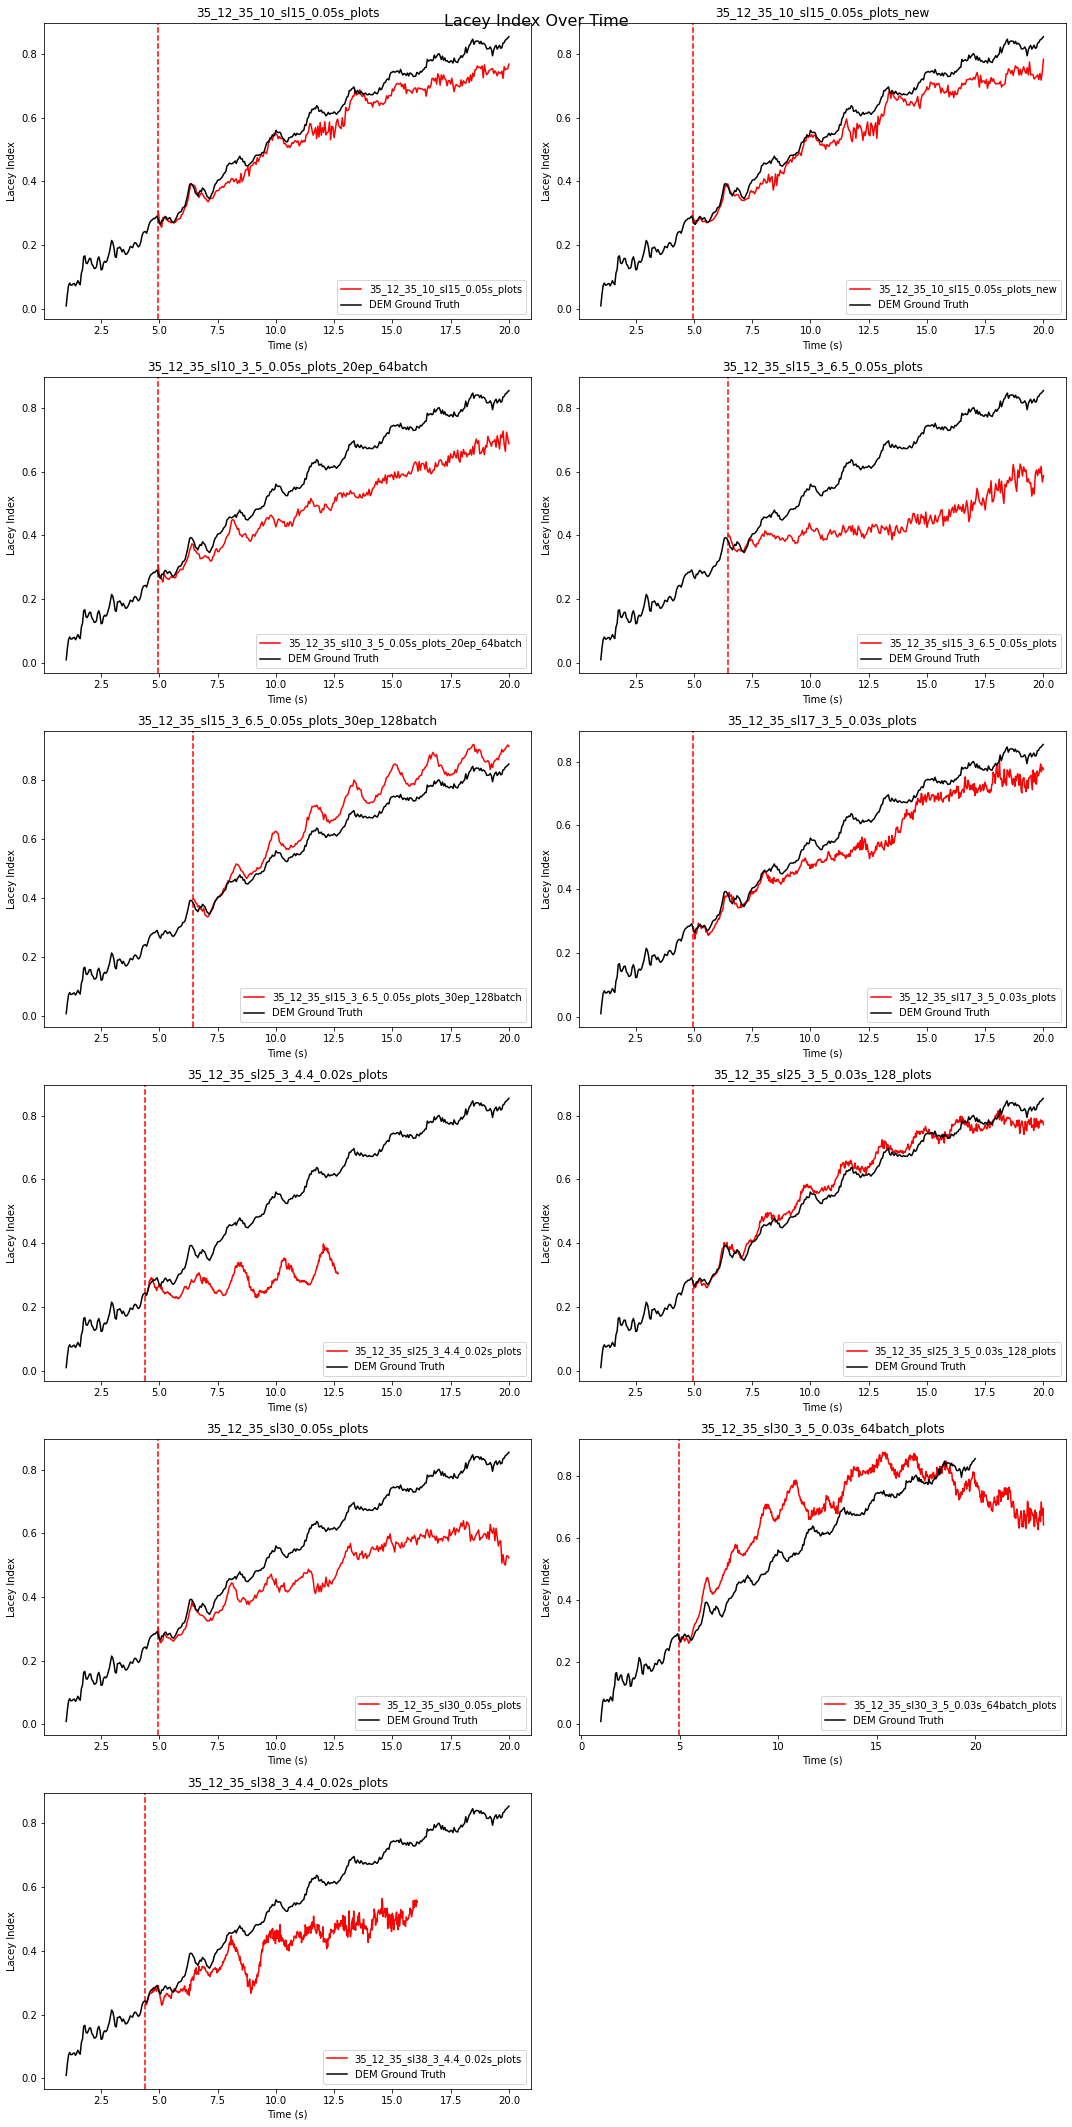

In [5]:
# Specify the folder path where your CSV files are located
folder_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data\RNNSR_plots"
dem_file = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data\dem_sim_plots\actual_lacey.csv"

# Initialize an empty list to store numpy arrays from each file
data_arrays = []
names = []

# Function to read CSV file and return a numpy array
def read_csv_to_numpy(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Iterate through all files in the folder and its subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('_lacey.csv'):
            file_path = os.path.join(root, filename)
            print(file_path)
            
            # Read the CSV file and append the numpy array to data_arrays
            data_arrays.append(read_csv_to_numpy(file_path))
            names.append(os.path.basename(os.path.dirname(file_path)))

# Calculate the number of rows needed for the subplots
num_plots = len(data_arrays)
num_rows = (num_plots + 1) // 2  # Ensure at least 1 row

# Plot the data from all files in 2-column subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.suptitle('Lacey Index Over Time', fontsize=16)

dem_data = read_csv_to_numpy(dem_file)

for i, (data_array, name) in enumerate(zip(data_arrays, names)):
    row_idx = (i) // 2
    col_idx = (i) % 2

    axs[row_idx, col_idx].plot(data_array[:, 0], data_array[:, 1], label=name, color="r")
    axs[row_idx, col_idx].set_title(name)
    axs[row_idx, col_idx].axvline(x=data_array[0,0], linestyle="--", color="r")

    axs[row_idx, col_idx].plot(dem_data[:, 0], dem_data[:, 1], label="DEM Ground Truth", color="k")

# Remove empty subplots if necessary
if num_plots % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Set common labels and legend
for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='Lacey Index')
    ax.legend()

plt.tight_layout()
plt.show()

In [6]:
len(data_arrays)

10

In [7]:
## Extrapolation algo

#simulation parameters
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.07)
num_bins = 10
direction = "y"

extrap = extrapolation(start_t, end_t, sim_path, domain_x, domain_y, domain_z, num_bins, direction)

In [8]:
#kinetic_energies, peak_times, peak_index, highlight_y = extrap.kin_energies(0.0002, 5)

(0.0, 10.0)

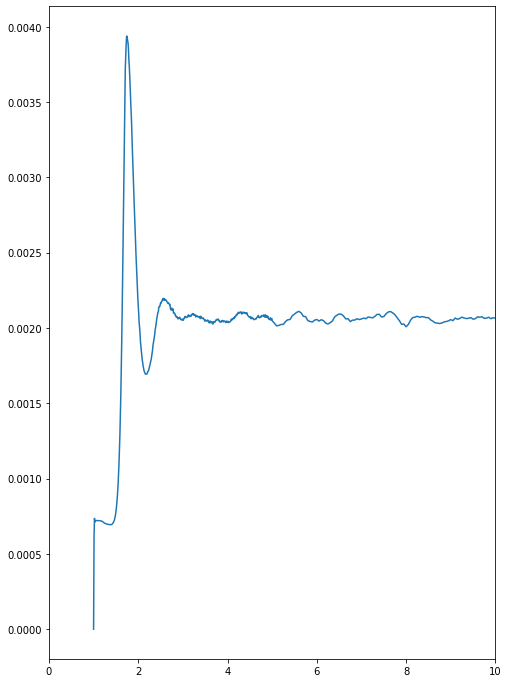

In [6]:
plt.figure(figsize=(8,12))
#kin_e = np.column_stack((extrap.deck.timestepValues[extrap.start:], kinetic_energies))
kin_e = np.genfromtxt(rf"V:\GrNN_EDEM-Sims\Rot_drum_400k_data\Export_Data\kin_energy.csv", delimiter=",")
plt.plot(kin_e[:,0], -kin_e[:,1])

#plt.scatter(peak_times, highlight_y, c="red")
x = (0,10)


plt.xlim(left=x[0], right=x[1])

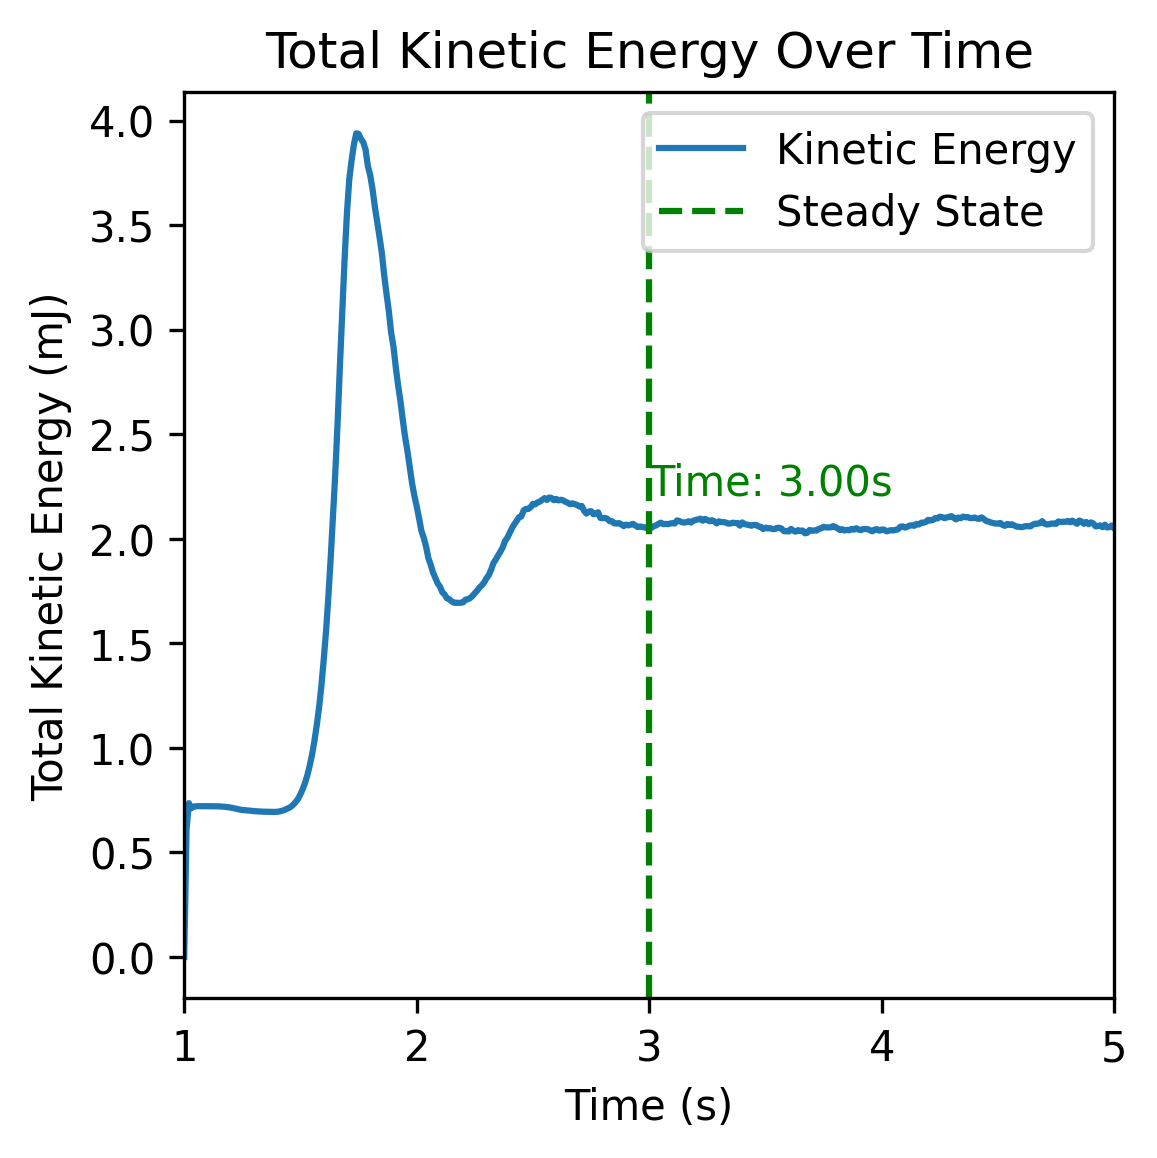

3.0000015467056476


In [15]:
threshold = 0.00005  # Adjust the threshold based on your specific case
downsample_kin = kin_e[201:403:5, :]
kinetic_energies = np.vstack((downsample_kin, kin_e[403:]))

# Find the index where the kinetic energies stabilize
kin_diff = np.abs(np.diff(kinetic_energies[:, 1]))

steady_state_index = np.argmax(kin_diff < threshold)

# print(kinetic_energies)
# print(kin_diff)
# print(steady_state_index)
# print(kin_diff[steady_state_index])
# plt.figure(dpi=100)
# plt.plot(kinetic_energies[1:, 0], kin_diff)
# print(kin_diff[steady_state_index]>threshold)


# Plotting
plt.figure(figsize=(4,4), dpi=300)
plt.plot(kin_e[:, 0], -kin_e[:, 1]*1000, label='Kinetic Energy')

# Plot vertical line at steady state
plt.axvline(x=kinetic_energies[steady_state_index, 0], color='green', linestyle='--', label='Steady State')
plt.text(kinetic_energies[steady_state_index, 0], (plt.ylim()[1]-plt.ylim()[0])/2, f'Time: {kinetic_energies[steady_state_index, 0]:.2f}s', verticalalignment='bottom', color="green")


# Set x-axis limits
x_limits = (1, 5)
plt.xlim(left=x_limits[0], right=x_limits[1])

# Add labels, title, legend, etc.
plt.xlabel('Time (s)')
plt.ylabel('Total Kinetic Energy (mJ)')
plt.title('Total Kinetic Energy Over Time')
plt.legend()
plt.show()

print(kinetic_energies[steady_state_index, 0])

Text(0.5, 1.0, 'State Determination by Change in Kinetic Energy')

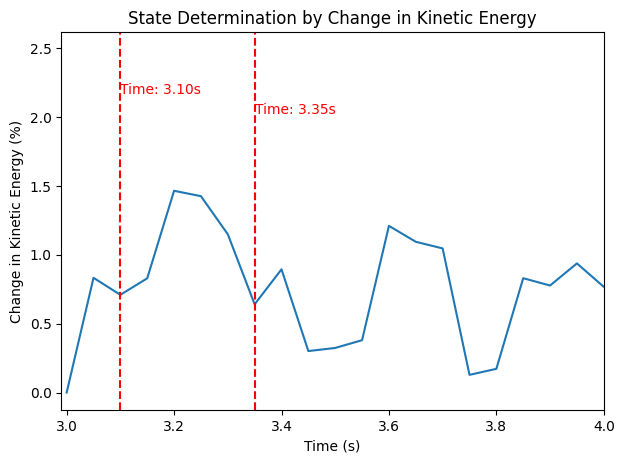

In [74]:
change_in_ke = np.column_stack((kinetic_energies[:,0], abs(kinetic_energies[:, 1]/kinetic_energies[0,1]-1)*100))

plt.figure(figsize=(7,5), dpi=100)

plt.plot(change_in_ke[:, 0], change_in_ke[:, 1], label='Kinetic Energy')

x_limits = (2.99, 4)
plt.xlim(left=x_limits[0], right=x_limits[1])

x_start = 3.1
x_end = 3.35

plt.axvline(x=3.1, color='red', linestyle='--', label='Steady State')
plt.axvline(x=3.35, color='red', linestyle='--', label='Steady State')

plt.text(x_start, 2.15, f'Time: {x_start:.2f}s', verticalalignment='bottom', color="red")
plt.text(x_end, 2, f'Time: {x_end:.2f}s', verticalalignment='bottom', color="red")
plt.ylabel("Change in Kinetic Energy (%)")
plt.xlabel("Time (s)")
plt.title("State Determination by Change in Kinetic Energy")


Text(0.5, 0, 'Time (s)')

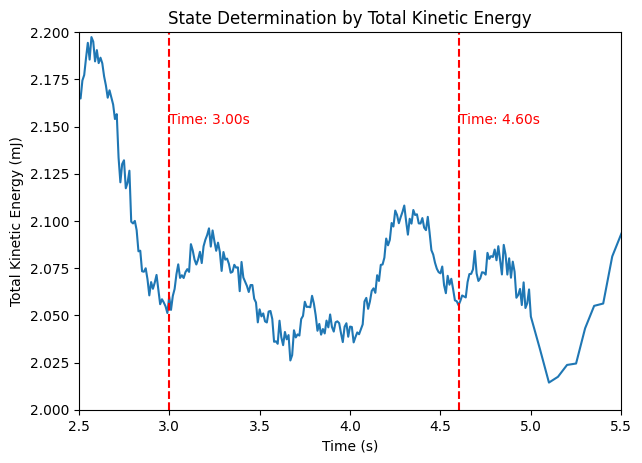

In [75]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(kin_e[:,0], -kin_e[:,1]*1000)

#plt.scatter(peak_times, highlight_y, c="red")
x = (2.5, 5.5)

plt.xlim(left=x[0], right=x[1])
plt.ylim(0.002*1000, 0.0022*1000)

x_start = 3
x_end = 4.6
plt.axvline(x=x_start, color='red', linestyle='--')
plt.axvline(x=x_end, color='red', linestyle='--')

plt.text(x_start, 2.15, f'Time: {x_start:.2f}s', verticalalignment='bottom', color="red")
plt.text(x_end, 2.15, f'Time: {x_end:.2f}s', verticalalignment='bottom', color="red")


plt.title("State Determination by Total Kinetic Energy")
plt.ylabel("Total Kinetic Energy (mJ)")
plt.xlabel("Time (s)")


In [13]:
t1 = 3
t2 = 3.05

t1_index = extrap.find_nearest(extrap.deck.timestepValues, t1)
t2_index = extrap.find_nearest(extrap.deck.timestepValues, t2)
print(t1_index, t2_index)

t1_data = extrap.get_particle_coords(t1_index)
t2_data = extrap.get_particle_coords(t2_index)


301 306


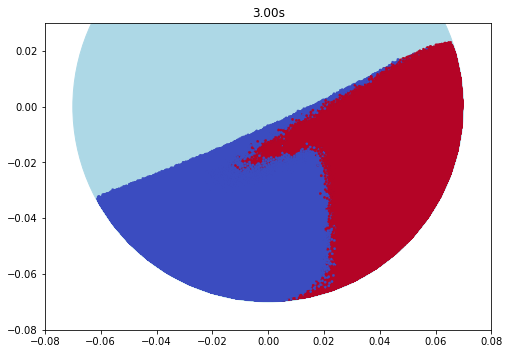

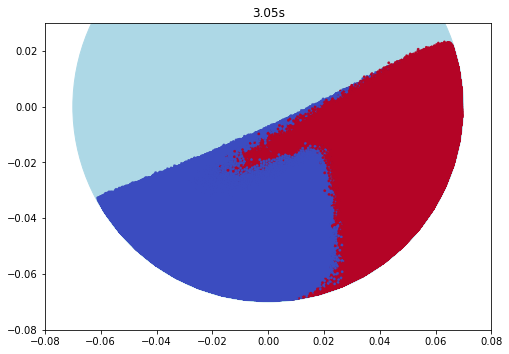

array([[ 6.39562671e-02, -2.45135322e-02, -2.34088425e-02,
         1.30899694e-06,  1.35140000e+04,  1.00000000e+00],
       [ 4.85111930e-02, -2.45122291e-02, -2.17601343e-02,
         1.30899694e-06,  3.54321000e+05,  1.00000000e+00],
       [ 5.09467575e-02, -2.45118883e-02, -4.20955052e-02,
         1.30899694e-06,  2.32076000e+05,  1.00000000e+00],
       ...,
       [ 3.90032745e-02,  2.45117119e-02, -2.27666587e-02,
         1.30899694e-06,  1.34499000e+05,  1.00000000e+00],
       [ 3.36119197e-02,  2.45120649e-02, -3.99278424e-02,
         1.30899694e-06,  2.31362000e+05,  1.00000000e+00],
       [ 4.65531450e-02,  2.45124079e-02, -4.59086104e-02,
         1.30899694e-06,  2.94893000e+05,  1.00000000e+00]])

In [14]:
id_dict = import_dict(id_dict_path, "id_dict")

plot_filename = rf"{plots_path}\10y_3_3.05\{t1:.2f}.png"
plot_particles(t1_data, id_dict, True, t1)


plot_filename = rf"{plots_path}\10y_3_3.05\{t2:.2f}.png"
plot_particles(t2_data, id_dict, True, t2)

In [15]:
with open(f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt", 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = float(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins)

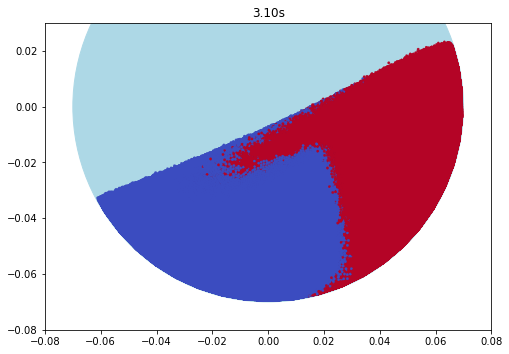

0.1695861871041047


<Figure size 432x288 with 0 Axes>

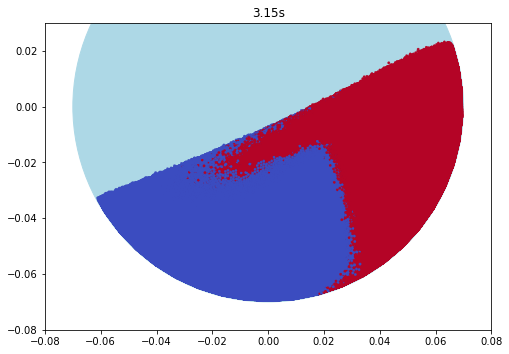

KeyboardInterrupt: 

In [16]:
b_coords, div_size = lacey.grid()
cut_off = 0.001
pos_dict_split = import_dict(id_dict_path, "10y_301_306_split_dict")
predicted_old = t2_data

init_time = 3.05
delta_t =  0.05
end_time = 20
extrap_iterations = int((end_time - init_time)/delta_t)+1

extrapolated_lacey = []
extrapolated_time = []


# for i in range(extrap_iterations):
#     time_i = init_time+(i+1)*delta_t
#     extrapolated_time.append(time_i)
    
#     plot_filename = rf"{plots_path}\10y_3_3.05\{time_i:.2f}.png"
#     predicted_new = plot_particles(extrap.extrapolate_particles(predicted_old, pos_dict_split), id_dict, 1, time_i, plot_path=plot_filename)
#     mass_1, mass_2, conc = lacey.bining(b_coords, div_size, predicted_new, cut_off)

#     Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(predicted_new))
#     extrapolated_lacey.append(Lacey_index)
#     print(Lacey_index)

#     predicted_old = predicted_new

In [ ]:
np.savetxt(rf"{plots_path}\10y_3_3.05\_lacey.csv", np.column_stack((extrapolated_time, extrapolated_lacey)), delimiter=",")

40it [00:23,  1.68it/s]


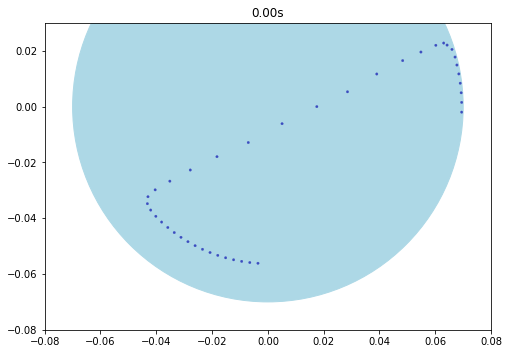

array([[ 6.92744955e-02, -2.45008619e-02,  4.94993586e-03,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.89350113e-02, -2.45005998e-02,  8.38089091e-03,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.59799197e-02, -2.45005447e-02,  2.04993486e-02,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.84343663e-02, -2.44957435e-02,  1.17127399e-02,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.94447273e-02, -2.44839691e-02,  1.50949395e-03,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.42251646e-02, -2.44833375e-02,  2.20470626e-02,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.70805879e-02, -2.44742943e-02,  1.77514844e-02,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.77492259e-02, -2.44662577e-02,  1.48997731e-02,
         1.30899694e-06,  3.58620000e+04,  0.00000000e+00],
       [ 6.94390771e-02, -2.44463478e-02, -1.989

In [ ]:
#Sequence Length analysis

from tqdm import tqdm

streamline_start_t = extrap.find_nearest(extrap.deck.timestepValues, 5)
streamline_end_t = extrap.find_nearest(extrap.deck.timestepValues, 7)
streamline_steps = range(streamline_start_t, streamline_end_t)

streamline_points = np.zeros((len(streamline_steps), 5))

particle_ids = [35862]

for j, i in tqdm(enumerate(streamline_steps)):
    timestep_coords = extrap.get_particle_coords(i)
    id_index = np.where(timestep_coords[:,-1]==35862)
    streamline_points[j, :] = timestep_coords[id_index]

plot_particles(streamline_points, id_dict, True, 0)

In [ ]:
extrap.get_particle_coords(i).shape

(384695, 5)